# Utilities

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
categories = {
    0: "Empty",
    1: "Tweezers",
    2: "Needle_driver"
}

colors = {
    0: (255, 0, 0),   # empty is red
    1: (0, 255, 0),   # tweezers is green
    2: (0, 0, 255)    # blue is needle driver
}

# Models comparisons:

## mAp and Loss graphs

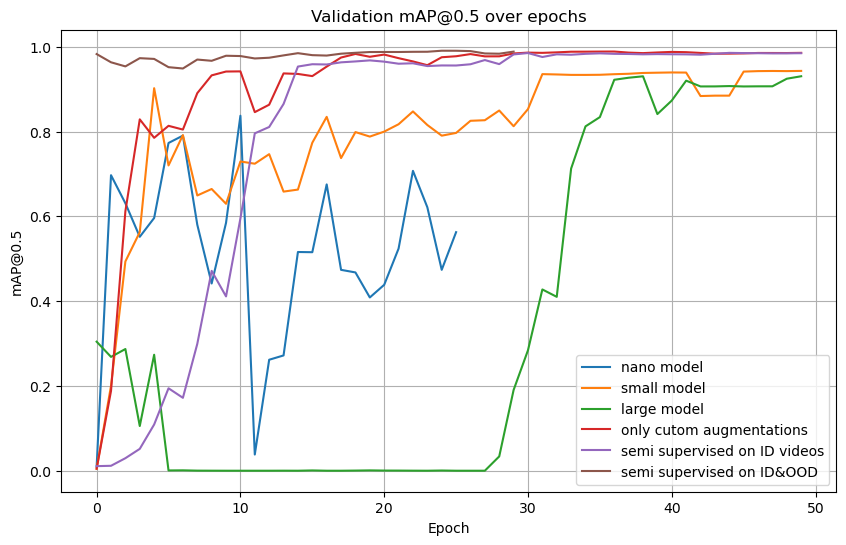

In [18]:
names_for_plotting = {'base_model1':'nano model',
                      'base_model2':'small model',
                      'base_model3':'large model',
                      'custom_augmentations': 'only cutom augmentations', 
                      'fine_tuned_with_pseudo': 'semi supervised on ID videos',
                      'fine_tuned_with_pseudo_ood':'semi supervised on ID&OOD'}


def plot_metric(run_name, metric_name):
    path = f"runs/detect/{run_name}/results.csv"
    df = pd.read_csv(path)
    plt.plot(df[metric_name], label=names_for_plotting[run_name])

plt.figure(figsize=(10, 6))
for run in ['base_model1', 'base_model2', 'base_model3','custom_augmentations','fine_tuned_with_pseudo','fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'metrics/mAP50(B)')
plt.legend()
plt.title("Validation mAP@0.5 over epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP@0.5")
plt.grid()
plt.show()

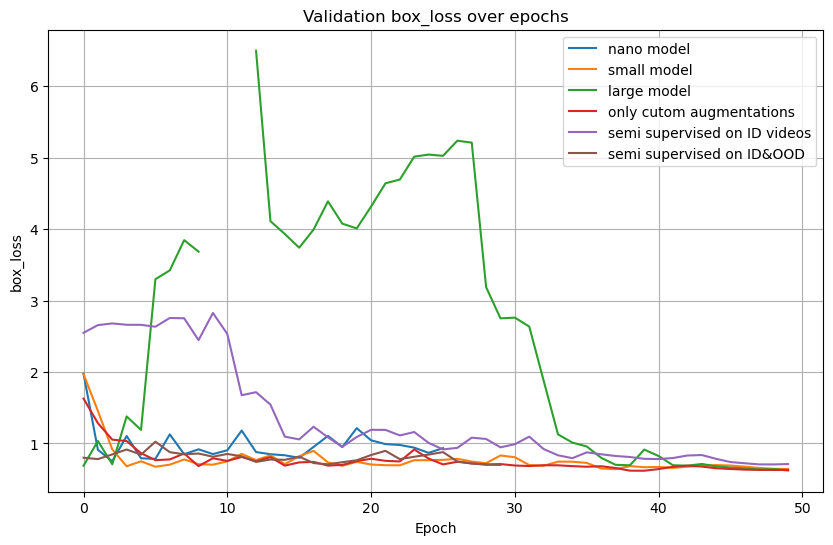

In [19]:
plt.figure(figsize=(10, 6))
for run in ['base_model1', 'base_model2', 'base_model3','custom_augmentations','fine_tuned_with_pseudo', 'fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'val/box_loss')
plt.legend()
plt.title("Validation box_loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("box_loss")
plt.grid()
plt.show()

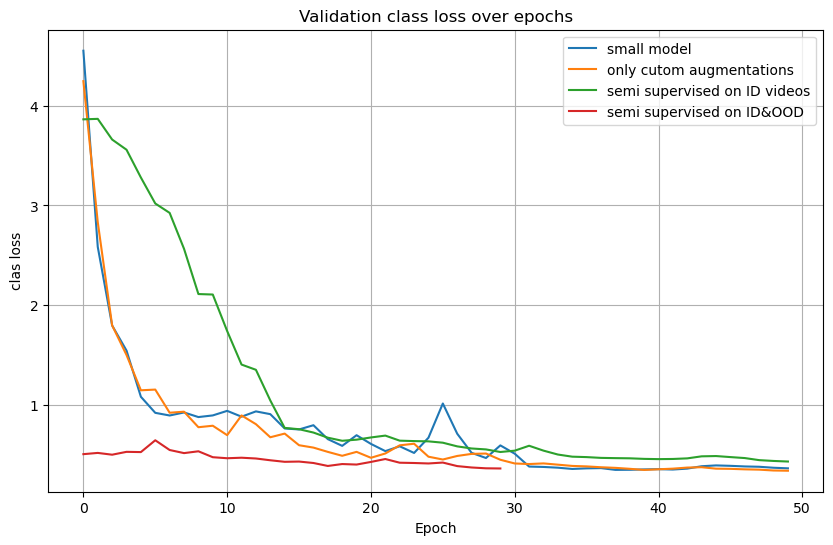

In [20]:
plt.figure(figsize=(10, 6))
for run in ['base_model2','custom_augmentations','fine_tuned_with_pseudo', 'fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'val/cls_loss')
plt.legend()
plt.title("Validation class loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("clas loss")
plt.grid()
plt.show()

In [12]:
# Define your models and labels
models = {
    "nano_model": "runs/detect/base_model1/weights/best.pt",
    "small_model": "runs/detect/base_model2/weights/best.pt",
    "large_model": "runs/detect/base_model3/weights/best.pt",
    "custom_augmented": "runs/detect/custom_augmentations/weights/best.pt",
    "semi_supervised_id": "runs/detect/fine_tuned_with_pseudo/weights/best.pt",
    "semi_supervised_ood" : "runs/detect/fine_tuned_with_pseudo_ood/weights/best.pt"
}


data_yaml = { "nano_model": "surgical.yaml",
            "small_model": "surgical.yaml",
            "large_model": "surgical.yaml",
            "custom_augmented":"copied_data.yaml",
            "semi_supervised_id": "copied_data.yaml",
            "semi_supervised_ood" : "copied_data.yaml"}

results = []
for name, path in models.items():
    model = YOLO(path)

    # Evaluate on training set
    train_metrics = model.val(split='train', data=data_yaml[name], verbose=False)
    # Evaluate on validation set
    val_metrics = model.val(split='val', data=data_yaml[name], verbose=False)
    print(train_metrics.results_dict)
    results.append({
        "model": name,
        "train_mAP50": train_metrics.box.map50,
        "val_mAP50": val_metrics.box.map50,
        # "train_loss": train_metrics.box.loss,
        "train_mAP50-95(B)": train_metrics.results_dict['metrics/mAP50-95(B)'],
        # "val_loss": val_metrics.box.loss
        "val_mAP50-95(B)": val_metrics.results_dict['metrics/mAP50-95(B)']
    })

df = pd.DataFrame(results)
df.to_csv("summary.csv")
print(df)


Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)


YOLOv9c summary (fused): 156 layers, 25,321,561 parameters, 0 gradients, 102.3 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 24.9±8.7 MB/s, size: 1766.0 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 27.69it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


                   all         61        135      0.849      0.905      0.917      0.721
Speed: 1.0ms preprocess, 6.5ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val26
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.4±0.4 ms, read: 35.4±18.8 MB/s, size: 5832.9 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 26.69it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


                   all         10         22      0.757      0.733      0.773      0.621
Speed: 0.1ms preprocess, 6.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val27
{'metrics/precision(B)': 0.8485996572451482, 'metrics/recall(B)': 0.9049781534105539, 'metrics/mAP50(B)': 0.9171284871570912, 'metrics/mAP50-95(B)': 0.721301444334386, 'fitness': 0.7408841486166566}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 1.6±2.3 ms, read: 32.8±13.7 MB/s, size: 6006.8 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 27.13it/s]


WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


                   all         61        135      0.997          1      0.995      0.932
Speed: 0.8ms preprocess, 3.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val28
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 1.3±2.2 ms, read: 35.1±20.9 MB/s, size: 3516.2 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 24.37it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


                   all         10         22      0.987      0.904      0.943      0.766
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val29
{'metrics/precision(B)': 0.9965066213437074, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9316790191903344, 'fitness': 0.9380111172713009}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9e summary (fused): 279 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.5 ms, read: 34.1±22.6 MB/s, size: 4168.7 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 26.57it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]


                   all         61        135      0.919      0.956      0.974      0.837
Speed: 0.8ms preprocess, 12.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val30
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 1.2±1.7 ms, read: 37.8±15.0 MB/s, size: 5271.6 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 32.39it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


                   all         10         22      0.857       0.88       0.93      0.725
Speed: 0.1ms preprocess, 13.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val31
{'metrics/precision(B)': 0.918518637094421, 'metrics/recall(B)': 0.9558361571768472, 'metrics/mAP50(B)': 0.9737413525838008, 'metrics/mAP50-95(B)': 0.8371371903651227, 'fitness': 0.8507976065869906}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3316.2±875.1 MB/s, size: 1796.9 KB)


val: Scanning /home/student/HW1/data/labels/train.cache... 633 images, 111 backgrounds, 461 corrupt: 100%|██████████| 633/633 [00:00<?, ?it/s]

train: /home/student/HW1/data/images/train/20_2_24_1_frame0000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1889.4      1010.1      441.61      943.58]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0029.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1888.3        1017      456.91       928.3      1182.9      1266.3      1050.1      605.96]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0058.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1899.7      1032.8      456.27      952.86      1202.1      1338.1      1003.7      607.59]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0087.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1897.4      1029.3      455.06      943.52      3018.9      956.74       978.4      772.35      1183.9      1407.9      1078.6       610.5]
train: /home/student/HW1/data/images/tra


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]


                   all        172        135      0.745      0.971      0.914      0.815
Speed: 1.0ms preprocess, 4.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val32
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3391.6±1528.8 MB/s, size: 5714.7 KB)


val: Scanning /home/student/HW1/data/labels/val.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


                   all         71        157      0.989      0.981      0.986      0.844
Speed: 1.4ms preprocess, 4.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val33
{'metrics/precision(B)': 0.7454108673621002, 'metrics/recall(B)': 0.970503457714068, 'metrics/mAP50(B)': 0.9141857270699756, 'metrics/mAP50-95(B)': 0.8149053572112824, 'fitness': 0.8248333941971518}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2523.6±1246.1 MB/s, size: 1539.8 KB)


val: Scanning /home/student/HW1/data/labels/train.cache... 633 images, 111 backgrounds, 461 corrupt: 100%|██████████| 633/633 [00:00<?, ?it/s]

train: /home/student/HW1/data/images/train/20_2_24_1_frame0000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1889.4      1010.1      441.61      943.58]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0029.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1888.3        1017      456.91       928.3      1182.9      1266.3      1050.1      605.96]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0058.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1899.7      1032.8      456.27      952.86      1202.1      1338.1      1003.7      607.59]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0087.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1897.4      1029.3      455.06      943.52      3018.9      956.74       978.4      772.35      1183.9      1407.9      1078.6       610.5]
train: /home/student/HW1/data/images/tra


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.85it/s]


                   all        172        135      0.981      0.963      0.986      0.824
Speed: 0.7ms preprocess, 3.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val34
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2750.4±1041.6 MB/s, size: 5270.8 KB)


val: Scanning /home/student/HW1/data/labels/val.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


                   all         71        157      0.987      0.985      0.985      0.799
Speed: 1.5ms preprocess, 4.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val35
{'metrics/precision(B)': 0.9806521000736717, 'metrics/recall(B)': 0.9633295204655886, 'metrics/mAP50(B)': 0.9855114331723027, 'metrics/mAP50-95(B)': 0.8241028170283715, 'fitness': 0.8402436786427646}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2640.9±992.0 MB/s, size: 1597.5 KB)


val: Scanning /home/student/HW1/data/labels/train.cache... 633 images, 111 backgrounds, 461 corrupt: 100%|██████████| 633/633 [00:00<?, ?it/s]

train: /home/student/HW1/data/images/train/20_2_24_1_frame0000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1889.4      1010.1      441.61      943.58]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0029.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1888.3        1017      456.91       928.3      1182.9      1266.3      1050.1      605.96]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0058.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1899.7      1032.8      456.27      952.86      1202.1      1338.1      1003.7      607.59]
train: /home/student/HW1/data/images/train/20_2_24_1_frame0087.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1897.4      1029.3      455.06      943.52      3018.9      956.74       978.4      772.35      1183.9      1407.9      1078.6       610.5]
train: /home/student/HW1/data/images/tra


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.21it/s]


                   all        172        135      0.996      0.987      0.994      0.833
Speed: 0.5ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val36
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3099.4±1643.4 MB/s, size: 5101.6 KB)


val: Scanning /home/student/HW1/data/labels/val.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


                   all         71        157      0.997       0.97      0.984       0.82
Speed: 1.6ms preprocess, 4.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val37
{'metrics/precision(B)': 0.9962302685233272, 'metrics/recall(B)': 0.9871794871794872, 'metrics/mAP50(B)': 0.9939655172413793, 'metrics/mAP50-95(B)': 0.8331313751456491, 'fitness': 0.8492147893552221}
                 model  train_mAP50  val_mAP50  train_mAP50-95(B)  \
0           nano_model     0.917128   0.773178           0.721301   
1          small_model     0.995000   0.942708           0.931679   
2          large_model     0.973741   0.930470           0.837137   
3     custom_augmented     0.914186   0.985501           0.814905   
4   semi_supervised_id     0.985511   0.984883           0.824103   
5  semi_supervised_ood     0.993966   0.983769           0.833131   

   val_mAP50-95(B)  
0         0.621140  
1         0.766172  
2         0.725121  
3         0.843709  
4    

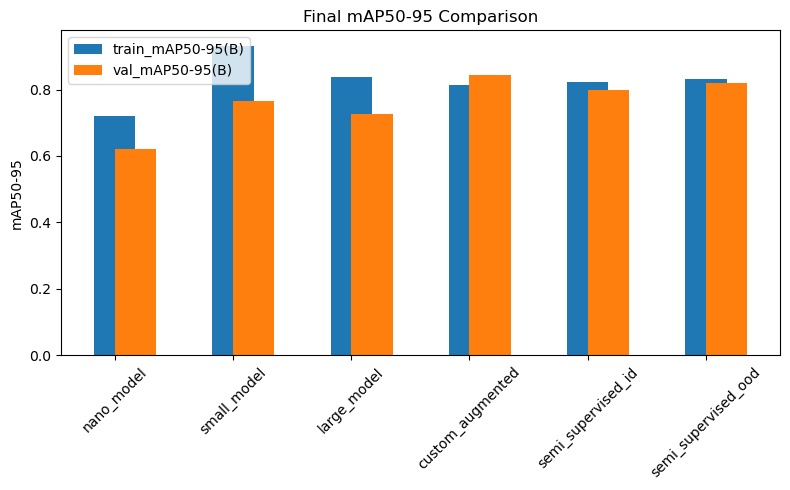

In [15]:
plt.figure(figsize=(8, 5))
x = df["model"]
plt.bar(x, df["train_mAP50-95(B)"], width=0.35, label="train_mAP50-95(B)", align='center')
plt.bar(x, df["val_mAP50-95(B)"], width=0.35, label="val_mAP50-95(B)", align='edge')
plt.ylabel("mAP50-95")
plt.xticks(rotation=45)
plt.title("Final mAP50-95 Comparison")
plt.legend()
plt.tight_layout()
plt.show()

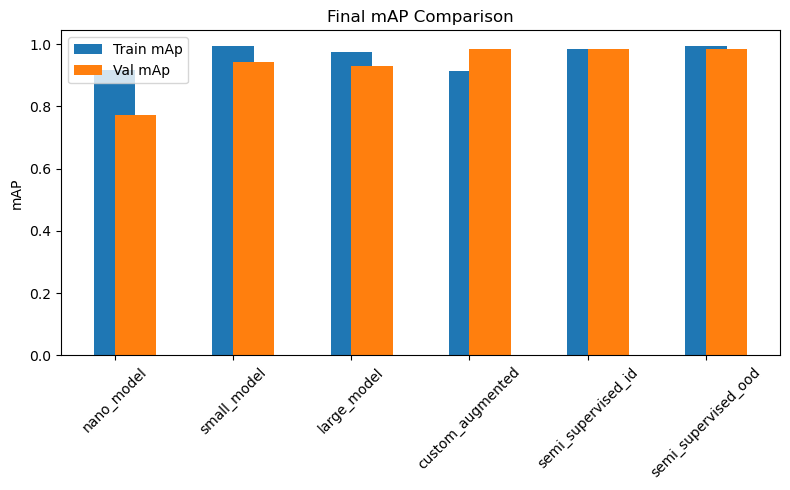

In [16]:
plt.figure(figsize=(8, 5))
x = df["model"]
plt.bar(x, df["train_mAP50"], width=0.35, label="Train mAp", align='center')
plt.bar(x, df["val_mAP50"], width=0.35, label="Val mAp", align='edge')
plt.ylabel("mAP")
plt.xticks(rotation=45)
plt.title("Final mAP Comparison")
plt.legend()
plt.tight_layout()
plt.show()